<a href="https://colab.research.google.com/github/jiminmini/mini/blob/main/4_4_%ED%95%84%EC%82%AC%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[개념 정리]**


---



#**결정 트리**


*    데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것

*   루프 노드, 규칙 노드, 리프 노드

*   결정 노드: 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리기반의 분류 규칙을 만드는 것


---


**결정 트리 모델의 특징**

*   롤이 명확, 시각화로 표현도 가능

*    각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음

*   과적합이라는 단점

**결정 트리 모델의 시각화**

*    export_graphviz(): 학습이 완료
된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줌


---


*    max_depth: 결정 트리의 최대 트리 깊이 제어

*    feature_importances_: ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됨
---
#**결정 트리 과적합**

*   visualize_boundary(): 해당 함수는 머신러닝 모델이 클래스 값을 예측하는 결
정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 잘 이해할 수 있게 해줌

#**[코드 필사]**

In [41]:
pip install graphviz

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

 # DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

 # 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)
 # DecisionTreeClassifer 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [43]:
from sklearn.tree import export_graphviz
 # export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

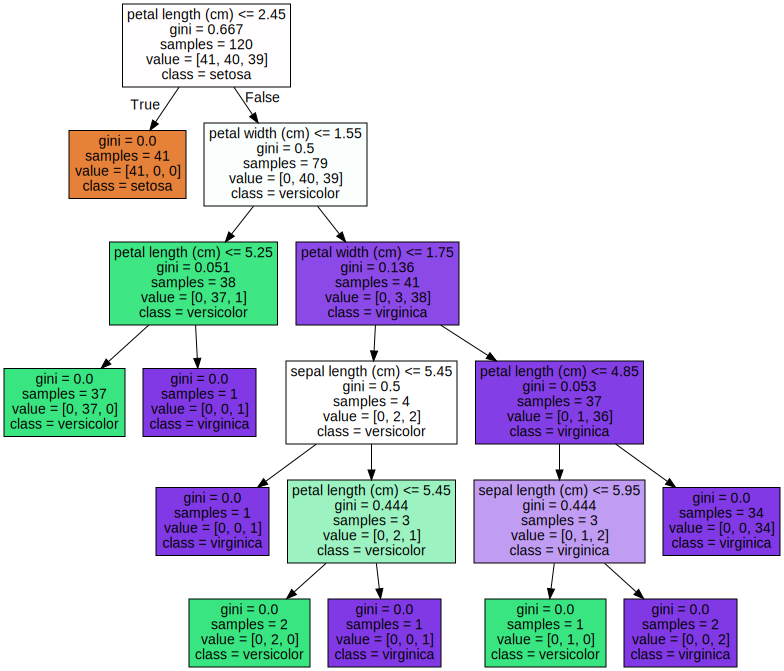

In [44]:
import graphviz
 # 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances：
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

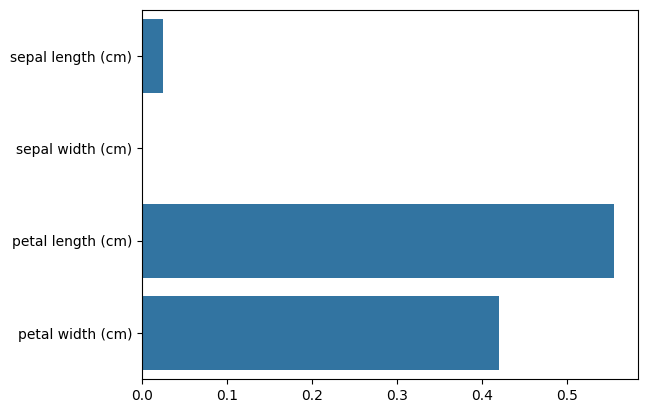

In [45]:
import seaborn as sns
import numpy as np
%matplotlib inline

 # feature importance 추출
print("Feature importances：\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

 # feature별 importance 마I핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

      # feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

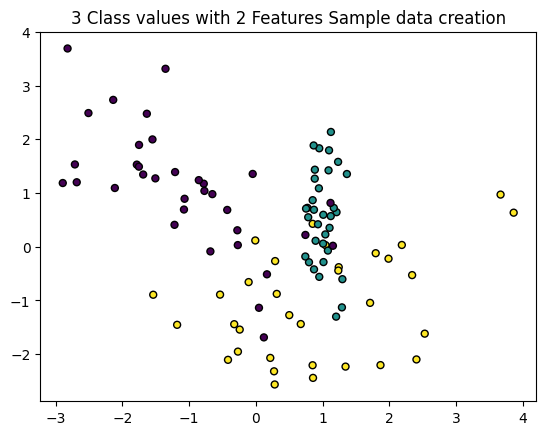

In [46]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("3 Class values with 2 Features Sample data creation")

 # 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

 # 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1 ], marker='o', c=y_labels, s=25, edgecolor='k')

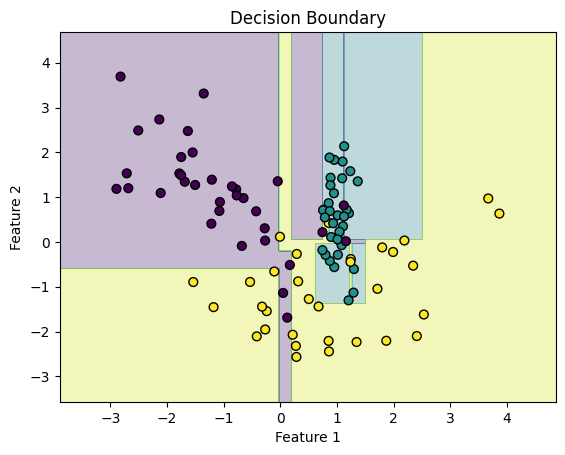

In [49]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

def visualize_boundary(classifier, X, y):
    # 결정 경계 시각화를 위한 x, y 범위
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # meshgrid에 대해 예측 수행
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 그리기
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

 # 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

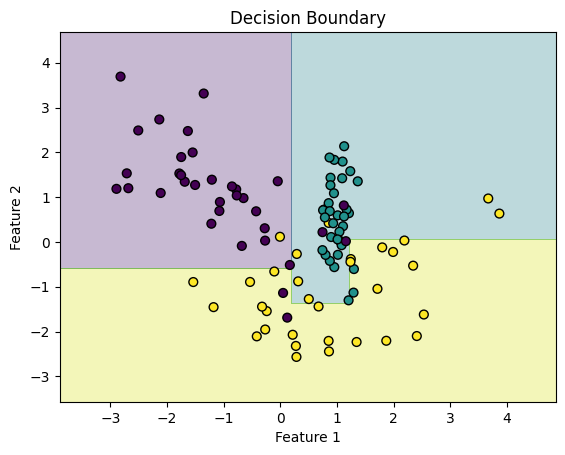

In [50]:
 # min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

 # features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd .read_csv('./features.txt', sep='\s+',
                               header=None, names=['column_index', 'column_name'])

 # 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [52]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df [feature_dup_df [ 'column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [53]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                         'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                            if x[1] >0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [61]:
import pandas as pd
def get_human_dataset( ):

# 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./features.txt', sep='\s+',
                      header=None,names=[ 'columnn_index', 'columnn_name' ])
 # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

 # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
 # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./X_train.txt', sep='\s+', names=feature_name )
    X_test = pd.read_csv('./X_test.txt',sep='\s+', names=feature_name)
 # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./y_train.txt',sep='\s+',header=None, names=['action'])
    y_test = pd.read_csv('./y_test.txt',sep='\s+',header=None,names=['action'])
 # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

KeyError: 'column_name'

In [63]:
print('## 학습 피처 데이터셋 info()')
import pandas as pd

df = pd.DataFrame(X_train)
df.info()

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       120 non-null    float64
 1   1       120 non-null    float64
 2   2       120 non-null    float64
 3   3       120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [65]:
import pandas as pd

y_train = pd.DataFrame(y_train, columns=['action'])
print(y_train['action'].value_counts())

action
0    41
1    40
2    39
Name: count, dtype: int64


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

 # 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'. format (accuracy))

 # DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.9333
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [70]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':[ 6, 8 ,10, 12, 16 ,20, 24],
    'min_samples_split': [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.9500
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 6, 'min_samples_split': 16}


In [71]:
 # GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성 .
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

 # max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.95
1,8,0.95
2,10,0.95
3,12,0.95
4,16,0.95
5,20,0.95
6,24,0.95


In [72]:
max_depths = [ 6, 8, 10, 12, 16, 20, 24]

 # max.depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.9333
max_depth = 8 정확도: 0.9333
max_depth = 10 정확도: 0.9333
max_depth = 12 정확도: 0.9333
max_depth = 16 정확도: 0.9333
max_depth = 20 정확도: 0.9333
max_depth = 24 정확도: 0.9333


In [74]:
params = {
    'max_depth' : [ 8, 12, 16, 20],
    'min_samples_split' : [16, 24],
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.9500
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [76]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.9333


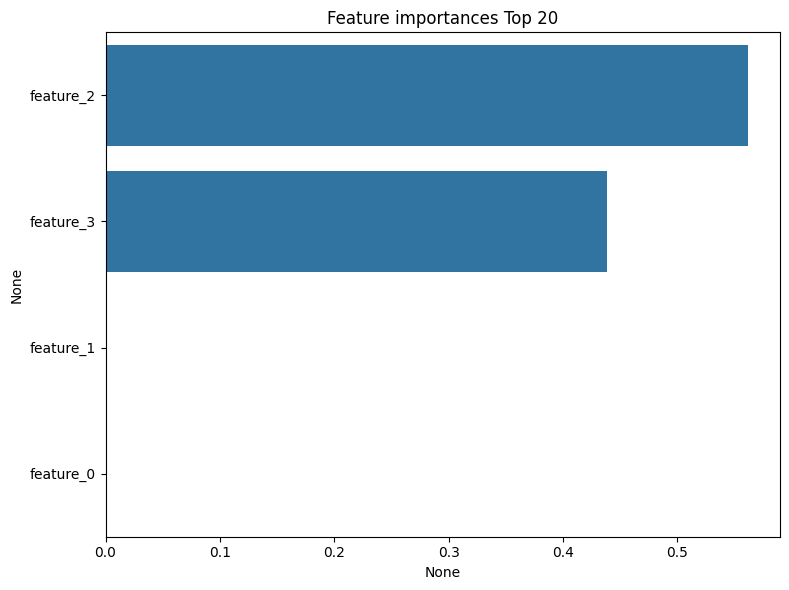

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# X_train이 ndarray인 경우, 임시 컬럼명 지정
ftr_importances = pd.Series(ftr_importances_values, index=[f'feature_{i}' for i in range(len(ftr_importances_values))])

# 중요도 상위 20개만 시각화
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.tight_layout()
plt.show()